In [85]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

In [86]:
canser_origin = './cancer.csv'


In [87]:
train_df = pd.read_csv(canser_origin)

train_df.tail(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
299,M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
300,F,63,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
301,M,64,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
302,F,65,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
303,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [88]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [89]:
train_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [90]:
train_df = train_df.rename({'CHRONIC DISEASE': 'CHRONIC_DISEASE','ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING','SHORTNESS OF BREATH': 'SHORTNESS_OF_BREATH','SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY', 'CHEST PAIN':'CHEST_PAIN'}, axis=1)
# ,'ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING','SHORTNESS OF BREATH': 'SHORTNESS_OF_BREATH','SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY', 'CHEST PAIN':'CHEST_PAIN'

In [91]:
# #  train_df.loc[train_df[	'SMOKING',	'YELLOW_FINGERS',	'ANXIETY',	'PEER_PRESSURE',	'CHRONIC_DISEASE',	'FATIGUE',	'ALLERGY',	'WHEEZING',	'ALCOHOL_CONSUMING',	'COUGHING',	'SHORTNESS_OF_BREATH',	'SWALLOWING_DIFFICULTY',	'CHEST_PAIN'].isin ([1]),	'SMOKING',	'YELLOW_FINGERS',	'ANXIETY',	'PEER_PRESSURE',	'CHRONIC_DISEASE',	'FATIGUE',	'ALLERGY',	'WHEEZING',	'ALCOHOL_CONSUMING',	'COUGHING',	'SHORTNESS_OF_BREATH',	'SWALLOWING_DIFFICULTY',	'CHEST_PAIN'] = 2
# train_df.loc[train_df[	'SMOKING'].isin ([1]),	'SMOKING'] = 0
# train_df.loc[train_df[	'SMOKING'].isin ([2]),	'SMOKING'] = 1
# train_df.loc[train_df[	'YELLOW_FINGERS'].isin ([1]),	'YELLOW_FINGERS'] = 0
# train_df.loc[train_df[	'YELLOW_FINGERS'].isin ([2]),	'YELLOW_FINGERS'] = 1
# train_df.loc[train_df[	'ANXIETY'].isin ([1]),	'ANXIETY'] = 0
# train_df.loc[train_df[	'ANXIETY'].isin ([2]),	'ANXIETY'] = 1
# train_df.loc[train_df[	'PEER_PRESSURE'].isin ([1]),	'PEER_PRESSURE'] = 0
# train_df.loc[train_df[	'PEER_PRESSURE'].isin ([2]),	'PEER_PRESSURE'] = 1
# train_df.loc[train_df[	'CHRONIC_DISEASE'].isin ([1]),	'CHRONIC_DISEASE'] = 0
# train_df.loc[train_df[	'CHRONIC_DISEASE'].isin ([2]),	'CHRONIC_DISEASE'] = 1
# # train_df.loc[train_df[	'FATIGUE'].isin ([1]),	'FATIGUE'] = 0
# # train_df.loc[train_df[	'FATIGUE'].isin ([2]),	'FATIGUE'] = 1
# # train_df.loc[train_df[	'FATIGUE'].isin ([1]),	'FATIGUE'] = 0
# # train_df.loc[train_df[	'FATIGUE'].isin ([2]),	'FATIGUE'] = 1
# # train_df.loc[train_df[	'ALLERGY'].isin ([1]),	'ALLERGY'] = 0
# # train_df.loc[train_df[	'ALLERGY'].isin ([2]),	'ALLERGY'] = 1
# # train_df.loc[train_df[	'WHEEZING'].isin ([1]),	'WHEEZING'] = 0
# # train_df.loc[train_df[	'WHEEZING'].isin ([2]),	'WHEEZING'] = 1
# # train_df.loc[train_df[	'ALCOHOL_CONSUMING'].isin ([1]),	'ALCOHOL_CONSUMING'] = 0
# # train_df.loc[train_df[	'ALCOHOL_CONSUMING'].isin ([2]),	'ALCOHOL_CONSUMING'] = 1
# # train_df.loc[train_df[	'COUGHING'].isin ([1]),	'COUGHING'] = 0
# # train_df.loc[train_df[	'COUGHING'].isin ([2]),	'COUGHING'] = 1
# # train_df.loc[train_df[	'SHORTNESS_OF_BREATH'].isin ([1]),	'SHORTNESS_OF_BREATH'] = 0
# # train_df.loc[train_df[	'SHORTNESS_OF_BREATH'].isin ([2]),	'SHORTNESS_OF_BREATH'] = 1
# # train_df.loc[train_df[	'SWALLOWING_DIFFICULTY'].isin ([1]),	'SWALLOWING_DIFFICULTY'] = 0
# # train_df.loc[train_df[	'SWALLOWING_DIFFICULTY'].isin ([2]),	'SWALLOWING_DIFFICULTY'] = 1
# # train_df.loc[train_df[	'CHEST_PAIN'].isin ([1]),	'CHEST_PAIN'] = 0
# # train_df.loc[train_df[	'CHEST_PAIN'].isin ([2]),	'CHEST_PAIN'] = 1
for column in train_df.columns:
    train_df[column] = train_df[column].replace({2: 'Yes',1 :'No'})
train_df.tail(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
299,M,65,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES
300,F,63,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,YES
301,M,64,No,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,YES
302,F,65,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,No,YES
303,M,51,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
304,F,56,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,YES
305,M,70,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
306,M,58,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,YES
307,M,67,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,YES
308,M,62,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,YES


In [92]:

# train_df.loc[train_df[	'ALLERGY'].isin ([1]),	'ALLERGY'] = 0
# train_df.tail(10)

In [93]:
train_df = pd.get_dummies(train_df)

In [141]:
train_df.tail(30)


,AGE,GENDER_F,GENDER_M,SMOKING_No,SMOKING_Yes,YELLOW_FINGERS_No,YELLOW_FINGERS_Yes,ANXIETY_No,ANXIETY_Yes,PEER_PRESSURE_No,...,COUGHING_No,COUGHING_Yes,SHORTNESS_OF_BREATH_No,SHORTNESS_OF_BREATH_Yes,SWALLOWING_DIFFICULTY_No,SWALLOWING_DIFFICULTY_Yes,CHEST_PAIN_No,CHEST_PAIN_Yes,LUNG_CANCER_NO,LUNG_CANCER_YES
279,59,1,0,1,0,0,1,0,1,0,...,0,1,1,0,0,1,1,0,0,1
280,59,1,0,0,1,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
281,55,0,1,0,1,1,0,1,0,1,...,1,0,0,1,1,0,0,1,1,0
282,46,0,1,1,0,0,1,0,1,1,...,1,0,1,0,0,1,0,1,1,0
283,60,0,1,1,0,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1
284,58,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,1
285,58,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
286,63,1,0,1,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
287,51,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,1,0,0,1
288,61,1,0,1,0,0,1,0,1,0,...,0,1,1,0,0,1,1,0,0,1


In [95]:
corr_matrix = train_df.corr().round(2)
corr_matrix

,AGE,GENDER_F,GENDER_M,SMOKING_No,SMOKING_Yes,YELLOW_FINGERS_No,YELLOW_FINGERS_Yes,ANXIETY_No,ANXIETY_Yes,PEER_PRESSURE_No,...,COUGHING_No,COUGHING_Yes,SHORTNESS_OF_BREATH_No,SHORTNESS_OF_BREATH_Yes,SWALLOWING_DIFFICULTY_No,SWALLOWING_DIFFICULTY_Yes,CHEST_PAIN_No,CHEST_PAIN_Yes,LUNG_CANCER_NO,LUNG_CANCER_YES
AGE,1.00,-0.02,0.02,0.08,-0.08,-0.01,0.01,-0.05,0.05,-0.02,...,-0.17,0.17,0.02,-0.02,0.00,-0.00,0.02,-0.02,-0.09,0.09
GENDER_F,-0.02,1.00,-1.00,0.04,-0.04,-0.21,0.21,-0.15,0.15,-0.28,...,0.13,-0.13,-0.06,0.06,-0.08,0.08,0.36,-0.36,0.07,-0.07
GENDER_M,0.02,-1.00,1.00,-0.04,0.04,0.21,-0.21,0.15,-0.15,0.28,...,-0.13,0.13,0.06,-0.06,0.08,-0.08,-0.36,0.36,-0.07,0.07
SMOKING_No,0.08,0.04,-0.04,1.00,-1.00,-0.01,0.01,0.16,-0.16,-0.04,...,-0.13,0.13,0.06,-0.06,0.03,-0.03,0.12,-0.12,0.06,-0.06
SMOKING_Yes,-0.08,-0.04,0.04,-1.00,1.00,0.01,-0.01,-0.16,0.16,0.04,...,0.13,-0.13,-0.06,0.06,-0.03,0.03,-0.12,0.12,-0.06,0.06
YELLOW_FINGERS_No,-0.01,-0.21,0.21,-0.01,0.01,1.00,-1.00,0.57,-0.57,0.32,...,-0.01,0.01,-0.11,0.11,0.35,-0.35,-0.10,0.10,0.18,-0.18
YELLOW_FINGERS_Yes,0.01,0.21,-0.21,0.01,-0.01,-1.00,1.00,-0.57,0.57,-0.32,...,0.01,-0.01,0.11,-0.11,-0.35,0.35,0.10,-0.10,-0.18,0.18
ANXIETY_No,-0.05,-0.15,0.15,0.16,-0.16,0.57,-0.57,1.00,-1.00,0.22,...,-0.23,0.23,-0.14,0.14,0.49,-0.49,-0.11,0.11,0.14,-0.14
ANXIETY_Yes,0.05,0.15,-0.15,-0.16,0.16,-0.57,0.57,-1.00,1.00,-0.22,...,0.23,-0.23,0.14,-0.14,-0.49,0.49,0.11,-0.11,-0.14,0.14
PEER_PRESSURE_No,-0.02,-0.28,0.28,-0.04,0.04,0.32,-0.32,0.22,-0.22,1.00,...,-0.09,0.09,-0.22,0.22,0.37,-0.37,-0.09,0.09,0.19,-0.19


In [96]:
# # train_df['SMOKING'] = train_df['SMOKING'].replace({'1':'0'},{'2':'1'})
# train_df.loc[train_df.SMOKING == 1,'SMOKING'] = 0
# train_df.loc[train_df.SMOKING == 2,'SMOKING'] = 1
# train_df.loc[train_df.YELLOW_FINGERS == 1,'YELLOW_FINGERS'] = 0
# train_df.loc[train_df.YELLOW_FINGERS == 2,'YELLOW_FINGERS'] = 1
# # train_df.loc[train_df['SMOKING'].isin ([2]),'SMOKING'] = 1
# train_df.tail(10)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

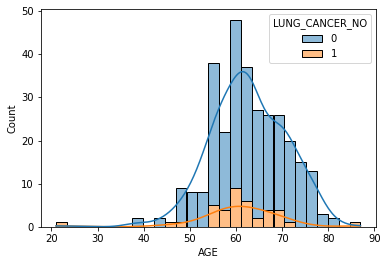

In [97]:
# sns.lineplot(data = train_df, x = 'LUNG_CANCER_YES', y = 'SMOKING_Yes', hue  = 'GENDER_F')
sns.histplot(data =train_df, x ='AGE', hue = 'LUNG_CANCER_NO', multiple='stack',  kde=True, shrink=.99, bins =28,  fill=True)

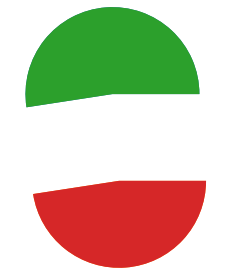

In [98]:
# plt.subplots(figsize =(12,12))
# labels = "1", "0"
# size = 0.7
# wedges,texts,autotexts = plt.pie(len(train_df[train_df[GENDER_F]=='1'][GENDER_F]), len(train_df[train_df[GENDER_F]=='0'][GENDER_F]) ),explode = (0.1,0)
plt.pie(train_df['GENDER_F'].value_counts('1'), train_df['GENDER_F'].value_counts('0'))
plt.pie(train_df['GENDER_F'].value_counts('1'), train_df['GENDER_F'].value_counts('0'))

plt.show()

<AxesSubplot:xlabel='GENDER_F', ylabel='count'>

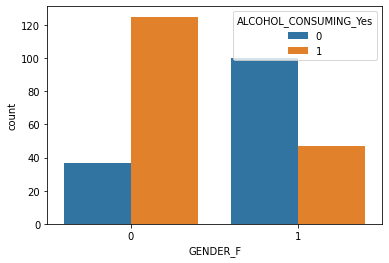

In [99]:
sns.countplot( data = train_df, x= 'GENDER_F', hue='ALCOHOL_CONSUMING_Yes')


<AxesSubplot:xlabel='GENDER_F', ylabel='count'>

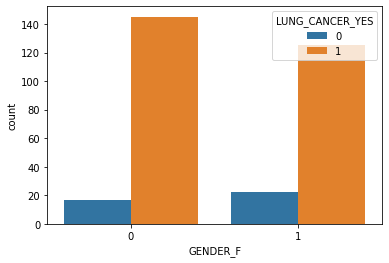

In [100]:
sns.countplot( data = train_df, x= 'GENDER_F', hue='LUNG_CANCER_YES')

In [128]:
scaler = StandardScaler()
# train_df_scl = scaler.fit_transform(train_df)

In [133]:
feat = ['AGE',	'GENDER_F',	'GENDER_M',	'SMOKING_Yes',		'YELLOW_FINGERS_Yes',		'ANXIETY_Yes',	'PEER_PRESSURE_Yes',	'CHRONIC_DISEASE_Yes', 'FATIGUE _Yes', 'ALLERGY _Yes', 'WHEEZING_Yes', 'ALCOHOL_CONSUMING_Yes',	'COUGHING_Yes',		'SHORTNESS_OF_BREATH_Yes',		'SWALLOWING_DIFFICULTY_Yes',	'CHEST_PAIN_Yes']
# feat = ['YELLOW_FINGERS_Yes','CHRONIC_DISEASE_Yes', 'FATIGUE _Yes', 'ALLERGY _Yes',  'ALCOHOL_CONSUMING_Yes',	'COUGHING_Yes',	'SWALLOWING_DIFFICULTY_Yes']
x = train_df [feat]
x = scaler.fit_transform (x)
y = train_df['LUNG_CANCER_YES']
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.3, random_state=21)


In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [135]:
lr.fit (x_train,y_train)

LinearRegression()

In [136]:
y_pred_1 = lr.predict(x_valid)
y_pred_1

array([0.57362852, 0.92554314, 0.91860397, 1.22726621, 0.98467718,
       1.12595084, 1.13254338, 0.74858348, 0.94654512, 0.95925785,
       1.20694945, 1.1071547 , 1.25626285, 0.7923199 , 0.98167106,
       0.90053657, 0.90584675, 0.79324553, 0.60582589, 1.20933899,
       0.48686765, 0.99150494, 0.94465339, 0.96113796, 0.72140964,
       0.55036606, 0.96892003, 0.6192945 , 1.24906365, 0.78741608,
       0.91220368, 0.94061164, 0.92746369, 0.67469566, 0.93935325,
       0.65203879, 1.07596338, 0.82025055, 1.05016695, 0.92317151,
       0.93899219, 0.93695597, 0.90566354, 0.93276067, 0.60822318,
       1.2423329 , 0.93695597, 1.08113937, 0.98730969, 0.8756411 ,
       0.60651608, 1.03758118, 0.50661107, 0.94258812, 0.83181418,
       0.8756411 , 1.19354746, 1.07884597, 1.15826317, 0.79024892,
       1.02540806, 0.97607333, 0.48297308, 1.07790804, 0.81195148,
       0.97018312, 1.25385823, 0.93395935, 0.56861419, 0.48663893,
       0.91100503, 0.91595398, 0.97258041, 0.91298303, 0.53642

In [137]:

r2_lr = r2_score(y_pred_1, y_valid)
r2_lr



-0.736697737647084

In [138]:
# from sklearn.metrics import accuracy_score, classification_report
# lr_report = classification_report(y_valid, y_pred_1)

In [139]:
lr_acc = round(accuracy_score(y_valid, y_pred_1)*100, ndigits=2)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

<BarContainer object of 16 artists>

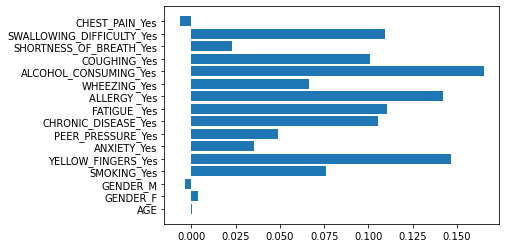

In [ ]:
plt.barh(x_train.columns, lr.coef_.flatten())